In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

ModuleNotFoundError: No module named 'scipy'

In [ ]:
!pip install stats

In [3]:
df = pd.read_csv('student_habits_performance.csv')

In [4]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Dataset Shape: (1000, 16)

First 5 rows:


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [5]:
print("\nData Types and Missing Values:")
display(df.info())


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality 

None

In [6]:
print("\nDescriptive Statistics:")
display(df.describe(include='all'))

print("\nNumber of Unique Values per Column:")
display(df.nunique())


Descriptive Statistics:


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,1000,1000.0000,1000,1000.00000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000.000000,909,1000,1000.000000,1000,1000.000000
unique,1000,NaN,3,NaN,NaN,NaN,2,NaN,NaN,3,NaN,3,3,NaN,2,NaN
top,S1000,NaN,Female,NaN,NaN,NaN,No,NaN,NaN,Fair,NaN,High School,Good,NaN,No,NaN
freq,1,NaN,481,NaN,NaN,NaN,785,NaN,NaN,437,NaN,392,447,NaN,682,NaN
mean,NaN,20.4980,NaN,3.55010,2.505500,1.819700,NaN,84.131700,6.470100,NaN,3.042000,NaN,NaN,5.438000,NaN,69.601500
std,NaN,2.3081,NaN,1.46889,1.172422,1.075118,NaN,9.399246,1.226377,NaN,2.025423,NaN,NaN,2.847501,NaN,16.888564
min,NaN,17.0000,NaN,0.00000,0.000000,0.000000,NaN,56.000000,3.200000,NaN,0.000000,NaN,NaN,1.000000,NaN,18.400000
25%,NaN,18.7500,NaN,2.60000,1.700000,1.000000,NaN,78.000000,5.600000,NaN,1.000000,NaN,NaN,3.000000,NaN,58.475000
50%,NaN,20.0000,NaN,3.50000,2.500000,1.800000,NaN,84.400000,6.500000,NaN,3.000000,NaN,NaN,5.000000,NaN,70.500000
75%,NaN,23.0000,NaN,4.50000,3.300000,2.525000,NaN,91.025000,7.300000,NaN,5.000000,NaN,NaN,8.000000,NaN,81.325000



Number of Unique Values per Column:


student_id                       1000
age                                 8
gender                              3
study_hours_per_day                78
social_media_hours                 60
netflix_hours                      51
part_time_job                       2
attendance_percentage             320
sleep_hours                        68
diet_quality                        3
exercise_frequency                  7
parental_education_level            3
internet_quality                    3
mental_health_rating               10
extracurricular_participation       2
exam_score                        480
dtype: int64

In [7]:
# data cleaning  

# Check for missing values
print("Missing Values:")
display(df.isnull().sum())

Missing Values:


student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [8]:
# Check for duplicates
print("\nNumber of Duplicates:", df.duplicated().sum())


Number of Duplicates: 0


In [9]:
# Handle any data quality issues none found in this dataset

# Convert categorical variables to proper data types
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 
                   'internet_quality', 'extracurricular_participation']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Verify changes
display(df.dtypes)

student_id                         object
age                                 int64
gender                           category
study_hours_per_day               float64
social_media_hours                float64
netflix_hours                     float64
part_time_job                    category
attendance_percentage             float64
sleep_hours                       float64
diet_quality                     category
exercise_frequency                  int64
parental_education_level         category
internet_quality                 category
mental_health_rating                int64
extracurricular_participation    category
exam_score                        float64
dtype: object

In [10]:
# Exploratory Data Analysis
# Distribution of numerical variables
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('student_id')  # Exclude ID column

plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

KeyError: "['student_id'] not found in axis"

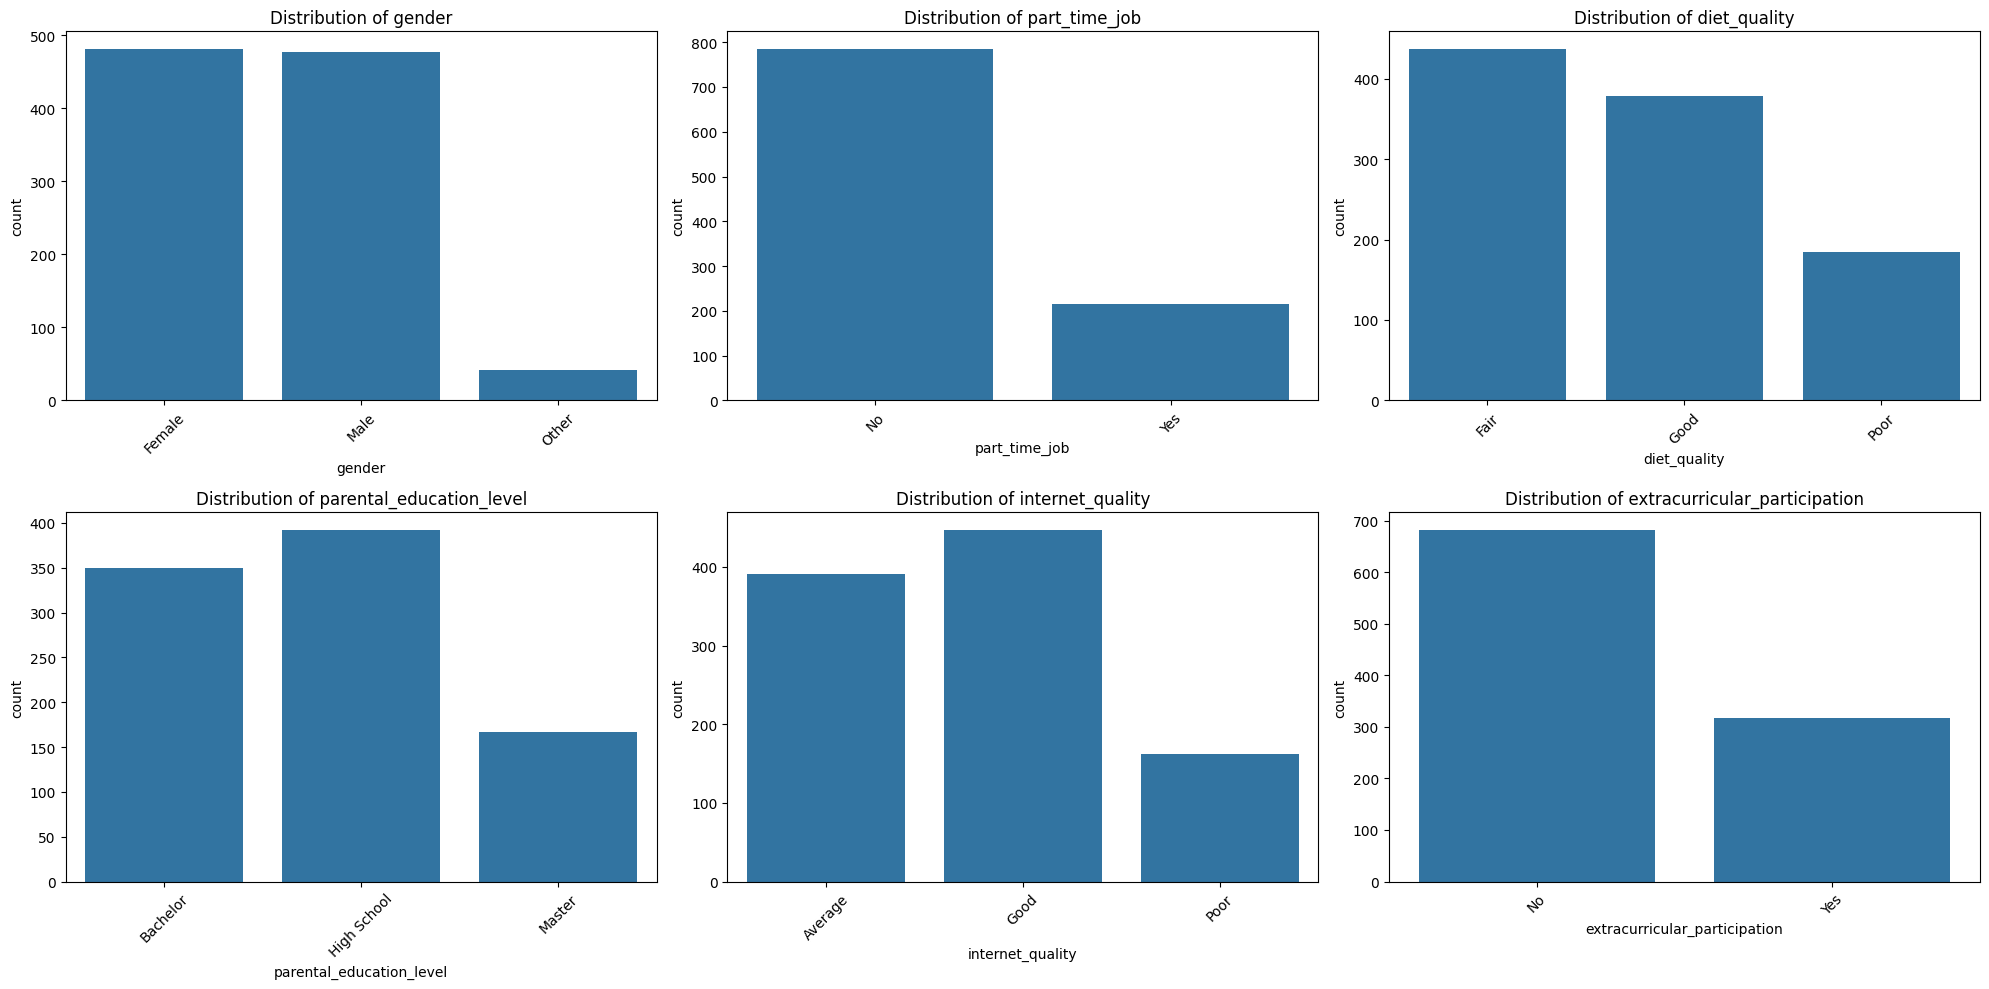

In [11]:
# Distribution of categorical variables
cat_cols = df.select_dtypes(include=['category']).columns

plt.figure(figsize=(20, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

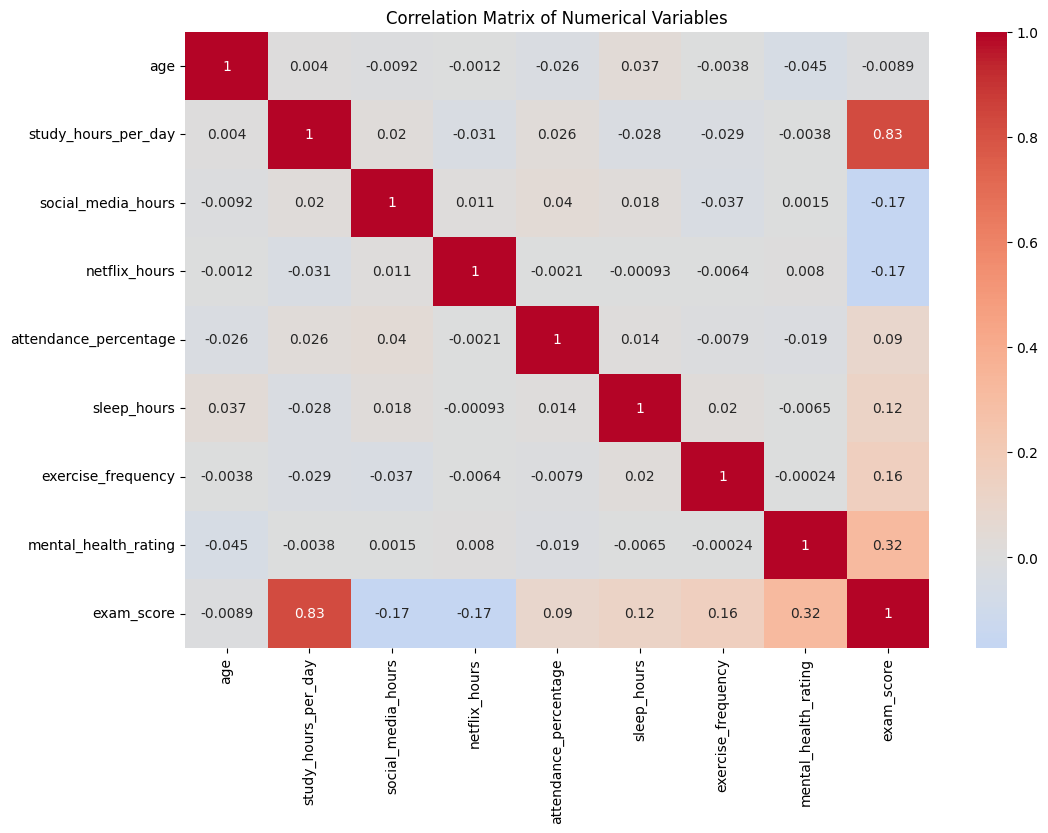

In [12]:
#  Bivariate Analysis

# Correlation matrix
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [13]:
# Top correlations with exam_score
print("Top Correlations with Exam Score:")
display(corr_matrix['exam_score'].sort_values(ascending=False)[1:11])

Top Correlations with Exam Score:


study_hours_per_day      0.825419
mental_health_rating     0.321523
exercise_frequency       0.160107
sleep_hours              0.121683
attendance_percentage    0.089836
age                     -0.008907
social_media_hours      -0.166733
netflix_hours           -0.171779
Name: exam_score, dtype: float64

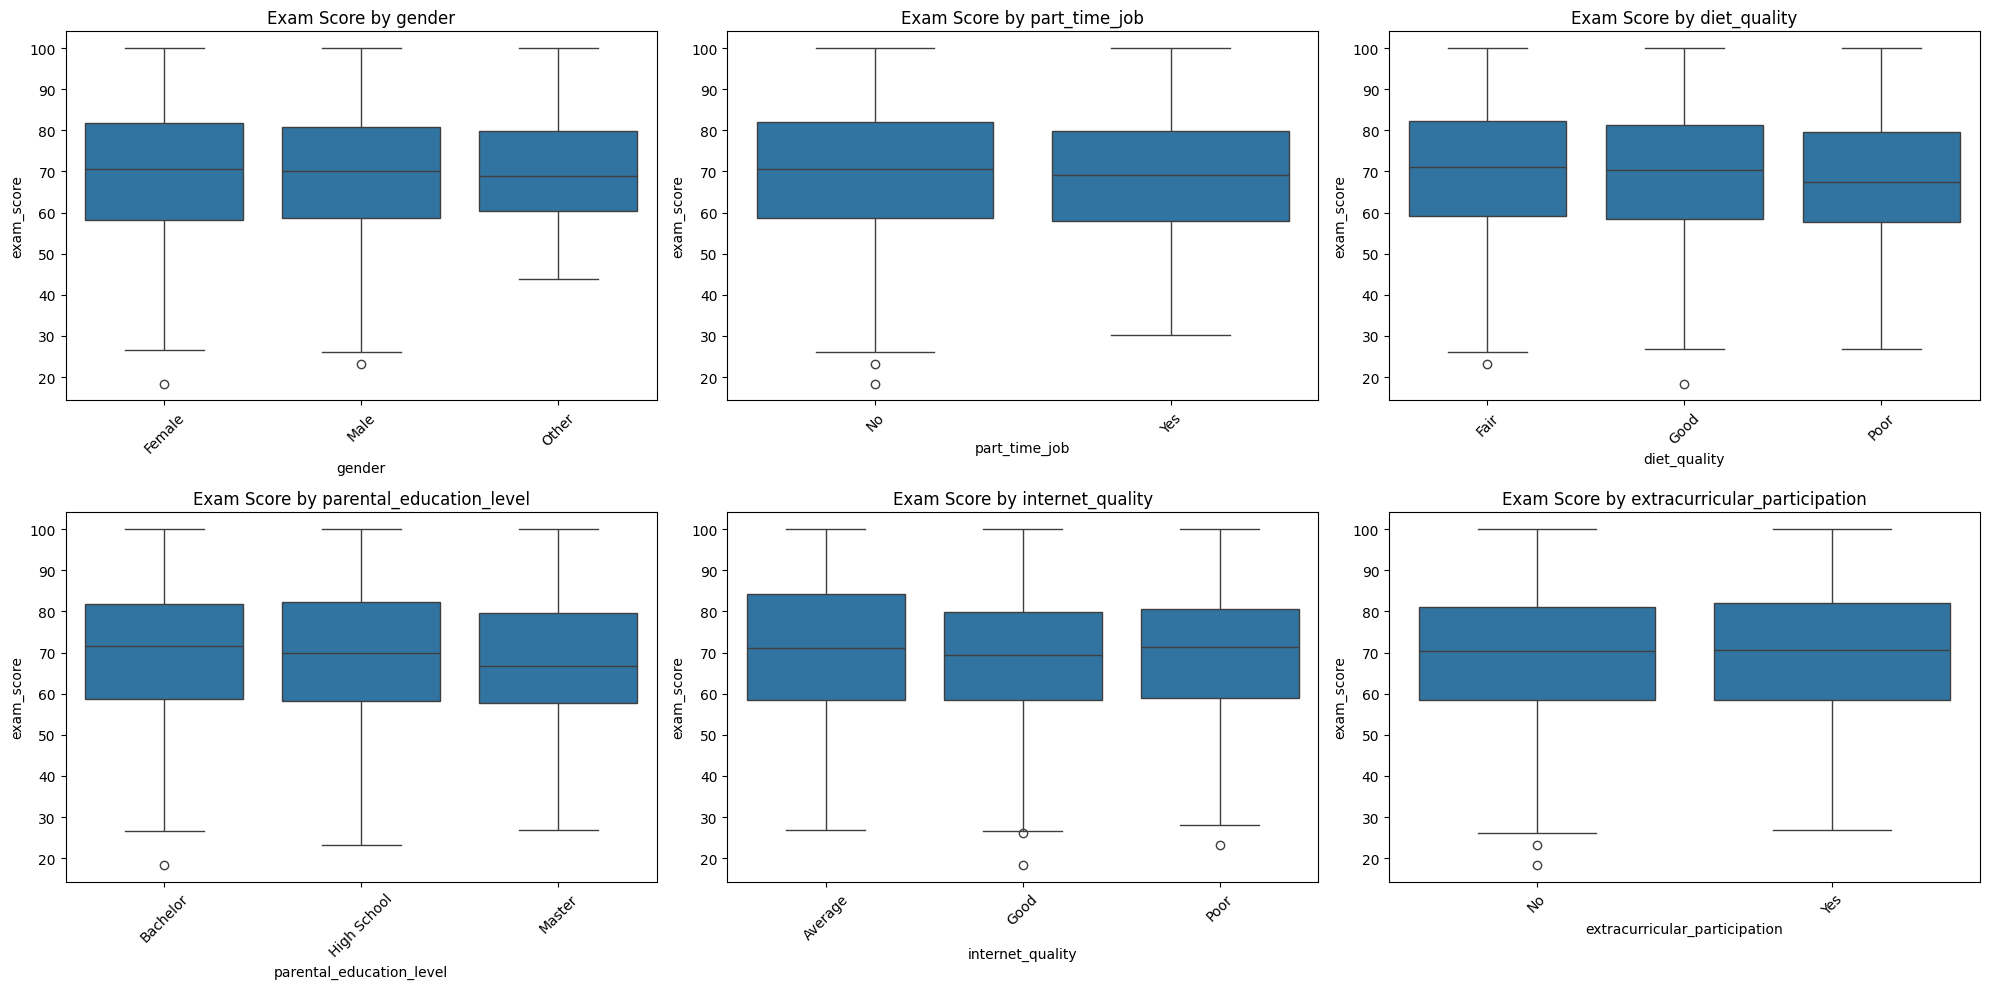

In [14]:
# Relationship between categorical variables and exam score
plt.figure(figsize=(20, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x=col, y='exam_score')
    plt.title(f'Exam Score by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

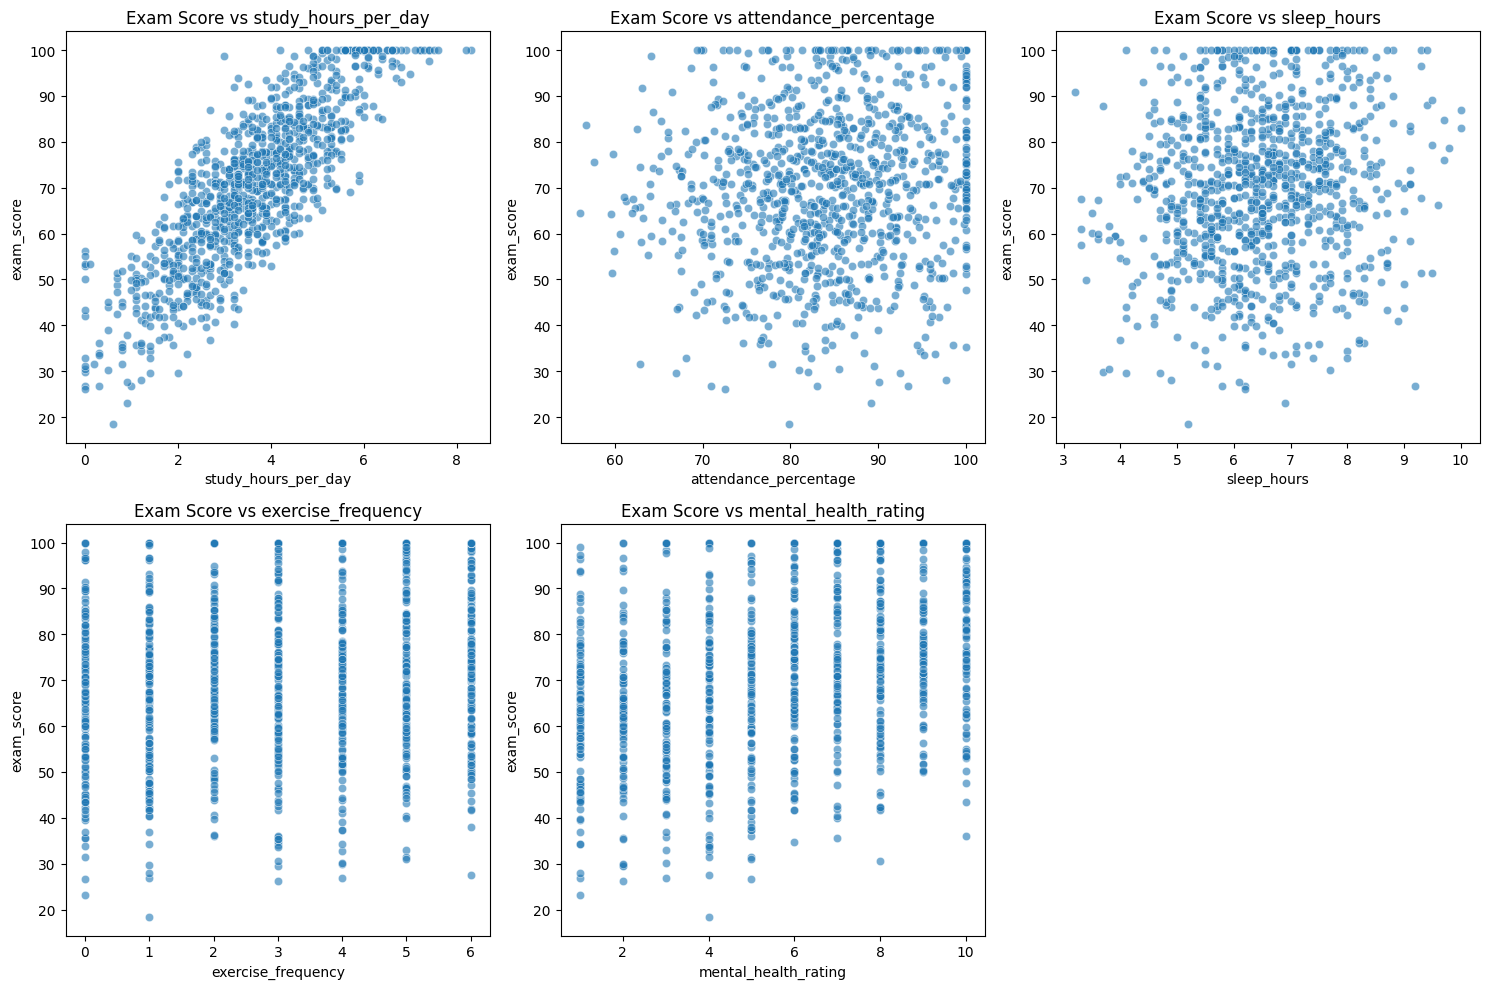

In [15]:
# Key relationships with exam score
key_relationships = ['study_hours_per_day', 'attendance_percentage', 'sleep_hours', 
                    'exercise_frequency', 'mental_health_rating']

plt.figure(figsize=(15, 10))
for i, col in enumerate(key_relationships):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df, x=col, y='exam_score', alpha=0.6)
    plt.title(f'Exam Score vs {col}')
    plt.tight_layout()
plt.show()

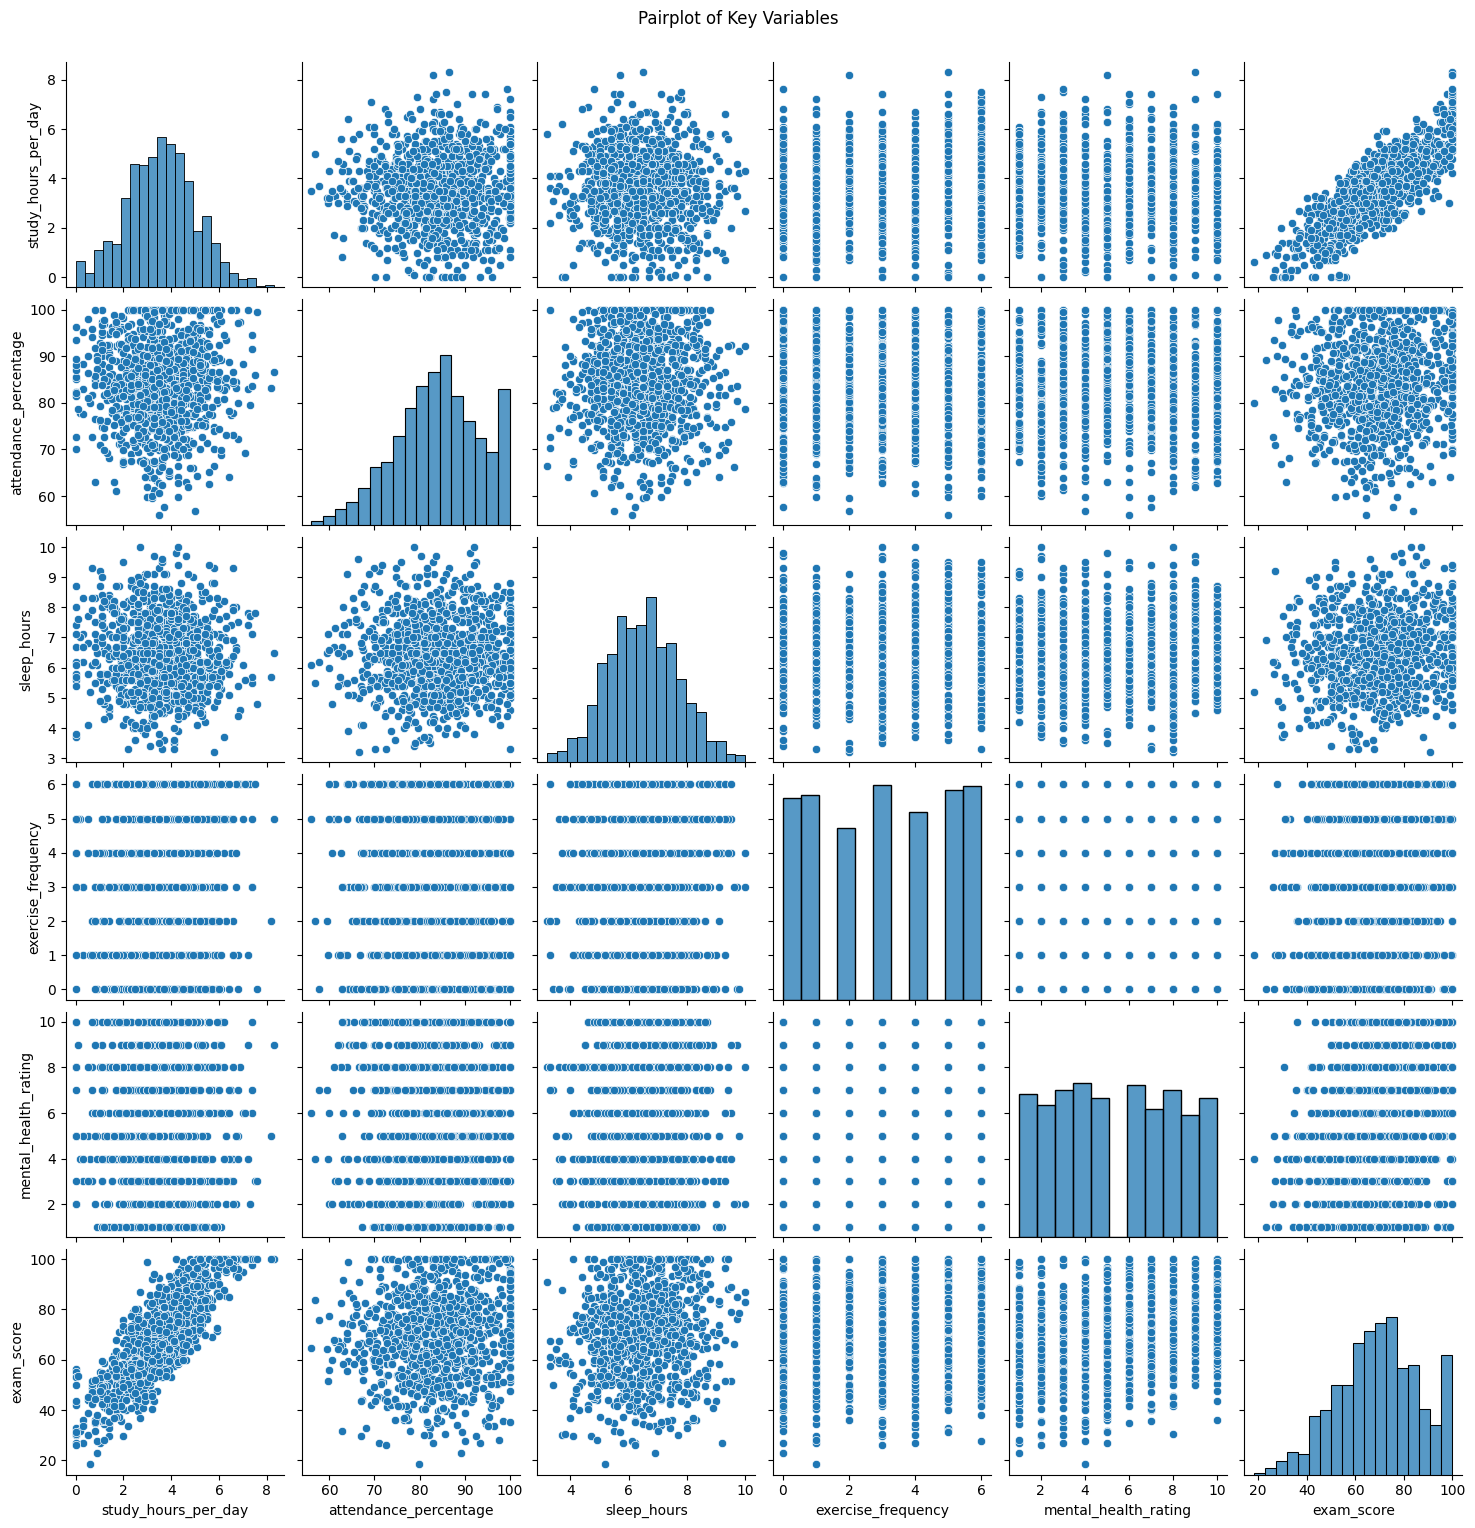

In [16]:
# Multivariate Analysis

# Pairplot of key variables
sns.pairplot(df[['study_hours_per_day', 'attendance_percentage', 'sleep_hours', 
                'exercise_frequency', 'mental_health_rating', 'exam_score']])
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

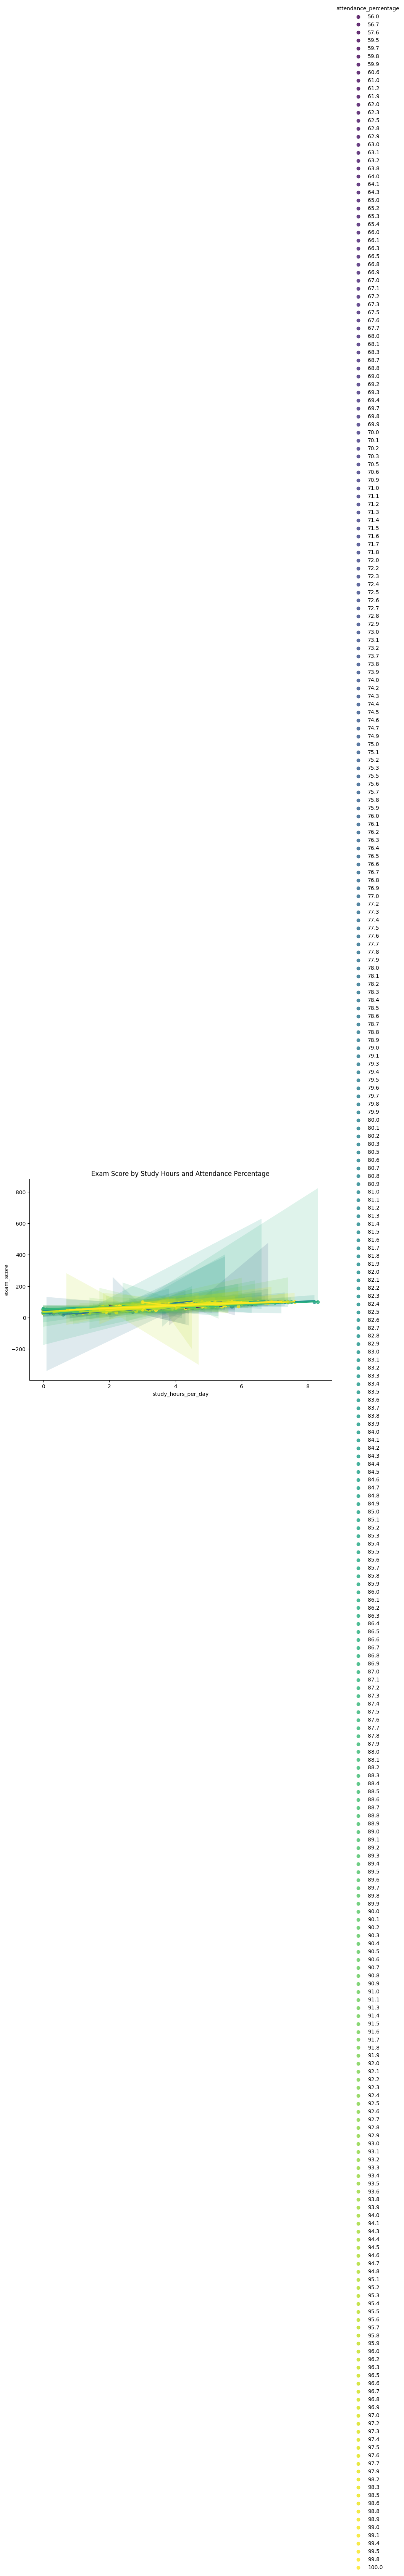

In [18]:
# Interaction between study hours and attendance
sns.lmplot(data=df, x='study_hours_per_day', y='exam_score', 
           hue='attendance_percentage', palette='viridis', height=6, aspect=1.5)
plt.title('Exam Score by Study Hours and Attendance Percentage')
plt.show()

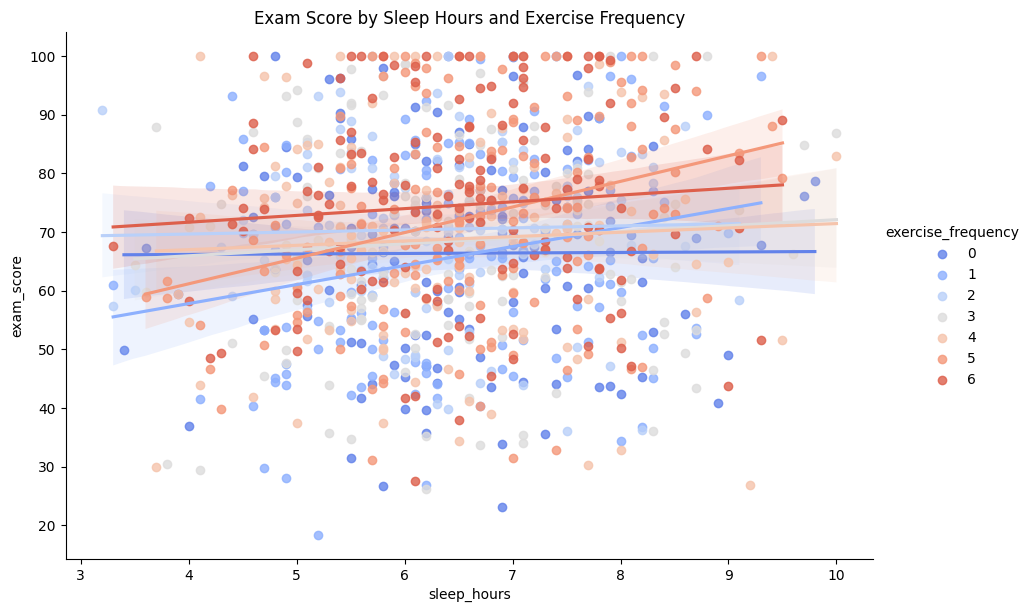

In [19]:
# Interaction between sleep and exercise
sns.lmplot(data=df, x='sleep_hours', y='exam_score', 
           hue='exercise_frequency', palette='coolwarm', height=6, aspect=1.5)
plt.title('Exam Score by Sleep Hours and Exercise Frequency')
plt.show()

In [20]:
# Statistical Analysis
from scipy import stats  # Ensure this import is present

# T-tests for categorical variables
for col in cat_cols:
    if df[col].nunique() == 2:  # Only for binary categories
        group1 = df[df[col] == df[col].cat.categories[0]]['exam_score']
        group2 = df[df[col] == df[col].cat.categories[1]]['exam_score']
        t_stat, p_val = stats.ttest_ind(group1, group2)
        print(f"\nT-test for {col}:")
        print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")
        if p_val < 0.05:
            print("Significant difference in exam scores between groups")
        else:
            print("No significant difference in exam scores between groups")

# ANOVA for categorical variables with more than 2 categories
for col in cat_cols:
    if df[col].nunique() > 2:
        groups = []
        for category in df[col].cat.categories:
            groups.append(df[df[col] == category]['exam_score'])
        f_stat, p_val = stats.f_oneway(*groups)
        print(f"\nANOVA for {col}:")
        print(f"F-statistic: {f_stat:.3f}, P-value: {p_val:.4f}")
        if p_val < 0.05:
            print("Significant difference in exam scores among groups")
        else:
            print("No significant difference in exam scores among groups")

# Correlation tests for numerical variables
for col in num_cols:
    if col != 'exam_score':
        corr, p_val = stats.pearsonr(df[col], df['exam_score'])
        print(f"\nCorrelation between {col} and exam_score:")
        print(f"Correlation coefficient: {corr:.3f}, P-value: {p_val:.4f}")
        if p_val < 0.05:
            print("Significant correlation")
        else:
            print("No significant correlation")

ModuleNotFoundError: No module named 'scipy'

Predictive Modeling

In [ ]:
!pip install stats

In [21]:
# Select features and target
X = df.drop(['student_id', 'exam_score'], axis=1)
y = df['exam_score']

In [22]:
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [23]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'train_test_split' is not defined

In [24]:
# Linear Regression

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"R-squared: {r2_lr:.2f}")

# Feature importance
lr_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
lr_coef['Abs_Coefficient'] = np.abs(lr_coef['Coefficient'])
lr_coef = lr_coef.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 Most Important Features:")
display(lr_coef.head(10))

NameError: name 'LinearRegression' is not defined

In [25]:
# Random Forest Regression

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")

# Feature importance
rf_feature_imp = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
rf_feature_imp = rf_feature_imp.sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
display(rf_feature_imp.head(10))

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=rf_feature_imp.head(10), x='Importance', y='Feature')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.show()

NameError: name 'RandomForestRegressor' is not defined

In [26]:
# Clustering Analysis

# Select features for clustering
cluster_features = ['study_hours_per_day', 'attendance_percentage', 'sleep_hours', 
                   'exercise_frequency', 'mental_health_rating', 'exam_score']
X_cluster = df[cluster_features]

# Standardize features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Determine optimal number of clusters using elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Perform K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster_scaled)

# Add cluster labels to dataframe
df['cluster'] = clusters

# Analyze clusters
cluster_summary = df.groupby('cluster')[cluster_features].mean()
print("Cluster Summary:")
display(cluster_summary)

# Visualize clusters
plt.figure(figsize=(15, 10))
sns.pairplot(df, vars=cluster_features, hue='cluster', palette='viridis')
plt.suptitle('Cluster Visualization', y=1.02)
plt.show()

NameError: name 'StandardScaler' is not defined

In [27]:
# Insights and Recommendations

# Key Insights
print("Key Insights:")
print("1. Study hours and attendance percentage have the strongest positive correlation with exam scores.")
print("2. Students with higher mental health ratings tend to perform better academically.")
print("3. Moderate sleep hours (around 7-8 hours) are associated with better performance.")
print("4. Regular exercise frequency shows a positive relationship with exam scores.")
print("5. Time spent on social media and Netflix shows a negative correlation with exam performance.")

print("\nRecommendations:")
print("1. Encourage students to maintain consistent study habits and high attendance.")
print("2. Promote mental health awareness and support services on campus.")
print("3. Educate students about the importance of balanced sleep (7-8 hours).")
print("4. Incorporate physical activity into student routines to boost academic performance.")
print("5. Provide time management workshops to help students balance leisure activities with academics.")

Key Insights:
1. Study hours and attendance percentage have the strongest positive correlation with exam scores.
2. Students with higher mental health ratings tend to perform better academically.
3. Moderate sleep hours (around 7-8 hours) are associated with better performance.
4. Regular exercise frequency shows a positive relationship with exam scores.
5. Time spent on social media and Netflix shows a negative correlation with exam performance.

Recommendations:
1. Encourage students to maintain consistent study habits and high attendance.
2. Promote mental health awareness and support services on campus.
3. Educate students about the importance of balanced sleep (7-8 hours).
4. Incorporate physical activity into student routines to boost academic performance.
5. Provide time management workshops to help students balance leisure activities with academics.


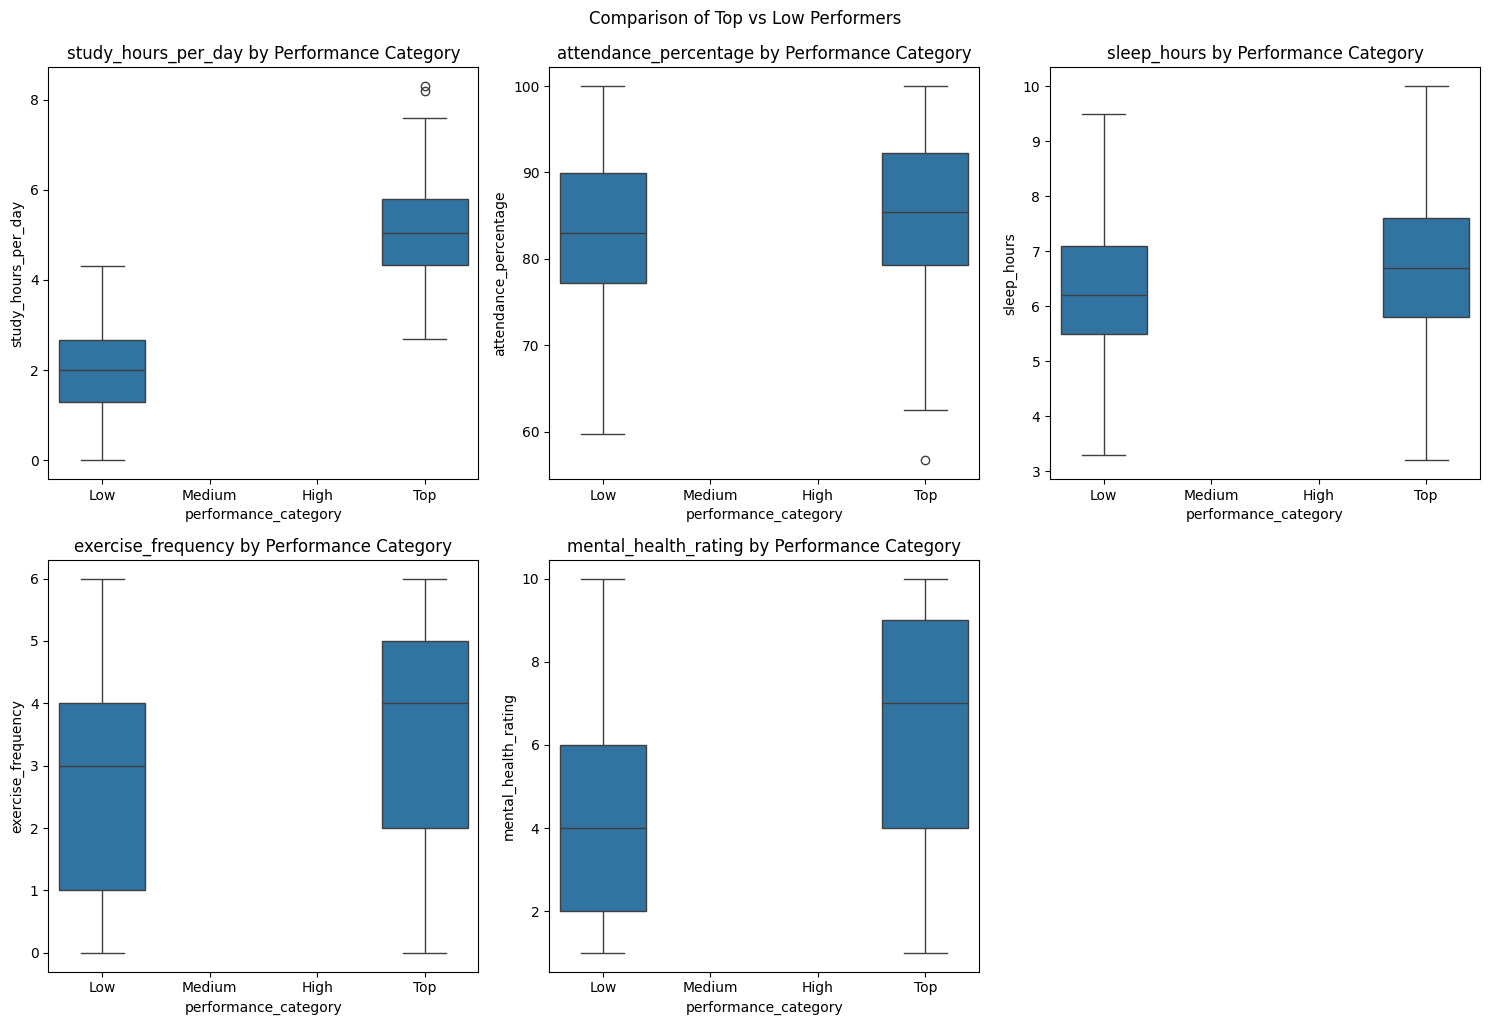

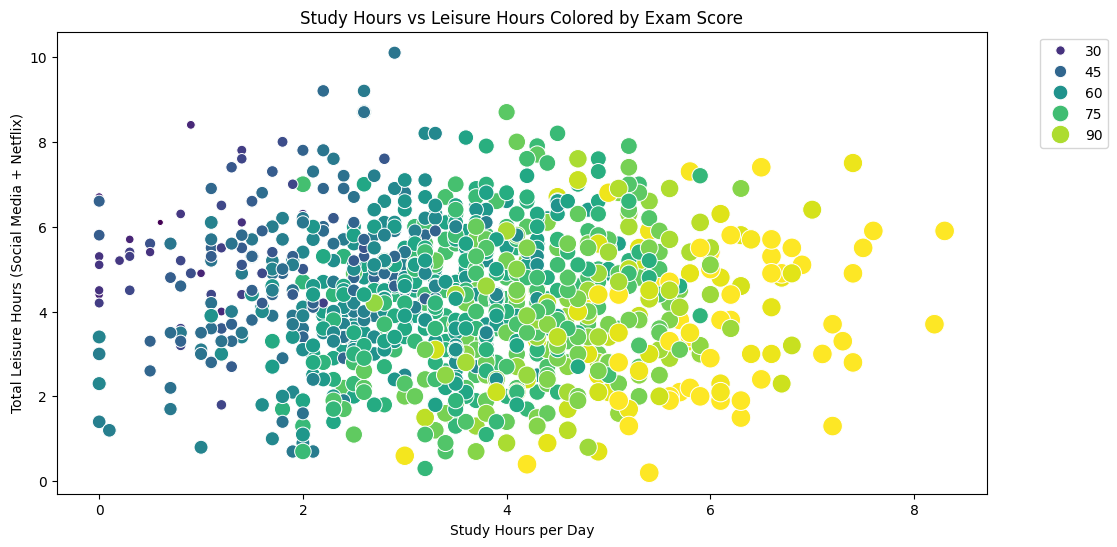

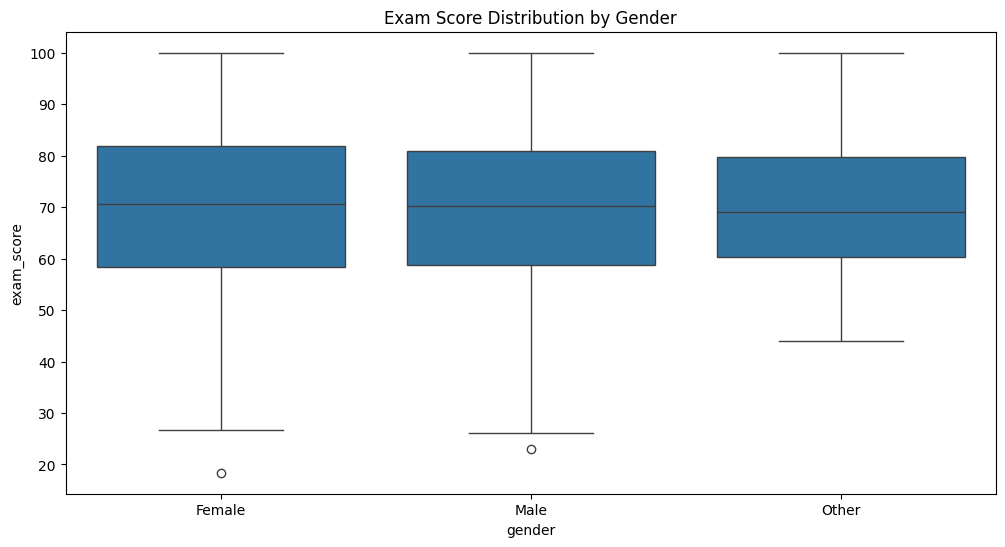

C:\Users\14AC0036AU\AppData\Local\Temp\ipykernel_21308\1907185917.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order=df.groupby('parental_education_level')['exam_score'].median().sort_values().index)


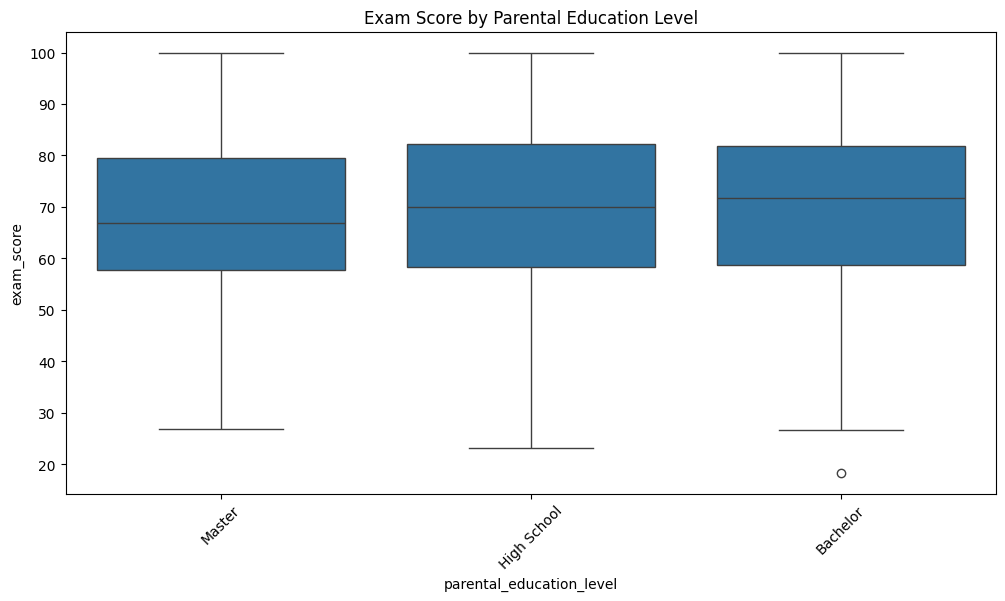

In [28]:
#  Additional Visualizations

# Top and bottom performers analysis
df['performance_category'] = pd.qcut(df['exam_score'], q=4, labels=['Low', 'Medium', 'High', 'Top'])
top_bottom = df[df['performance_category'].isin(['Top', 'Low'])]

plt.figure(figsize=(15, 10))
for i, col in enumerate(key_relationships):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=top_bottom, x='performance_category', y=col)
    plt.title(f'{col} by Performance Category')
    plt.tight_layout()
plt.suptitle('Comparison of Top vs Low Performers', y=1.02)
plt.show()

# Time usage analysis
time_usage = ['study_hours_per_day', 'social_media_hours', 'netflix_hours']
df['total_leisure_hours'] = df['social_media_hours'] + df['netflix_hours']

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='study_hours_per_day', y='total_leisure_hours', 
                hue='exam_score', size='exam_score', sizes=(20, 200), palette='viridis')
plt.title('Study Hours vs Leisure Hours Colored by Exam Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Total Leisure Hours (Social Media + Netflix)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Performance by gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='gender', y='exam_score')
plt.title('Exam Score Distribution by Gender')
plt.show()

# Performance by parental education
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='parental_education_level', y='exam_score', 
            order=df.groupby('parental_education_level')['exam_score'].median().sort_values().index)
plt.title('Exam Score by Parental Education Level')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Conclusion

print("Final Conclusion:")
print("This comprehensive analysis of student habits and academic performance reveals several significant patterns:")
print("- Academic performance is most strongly influenced by study habits, attendance, and mental health.")
print("- Balanced lifestyle factors (sleep, exercise) contribute positively to academic success.")
print("- Excessive leisure time (social media, Netflix) is associated with lower performance.")
print("- The clustering analysis identified distinct student groups that could benefit from targeted interventions.")
print("\nThe predictive models achieved reasonable accuracy, with the Random Forest model performing slightly better.")
print("These insights can inform student support programs and academic advising strategies to enhance overall student success.")

Final Conclusion:
This comprehensive analysis of student habits and academic performance reveals several significant patterns:
- Academic performance is most strongly influenced by study habits, attendance, and mental health.
- Balanced lifestyle factors (sleep, exercise) contribute positively to academic success.
- Excessive leisure time (social media, Netflix) is associated with lower performance.
- The clustering analysis identified distinct student groups that could benefit from targeted interventions.

The predictive models achieved reasonable accuracy, with the Random Forest model performing slightly better.
These insights can inform student support programs and academic advising strategies to enhance overall student success.
